In [1]:
import pygor.filehandling
import pygor.load
import pygor.strf.analyse

# External
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os 
import pathlib
import scipy
%reload_ext autoreload
%autoreload 2
# Test
user = pathlib.Path(os.getcwd()).parents[-3].stem
user

sns.set_context('talk')

c:\Users\Simen\miniconda3\envs\strfclone\lib\site-packages\skimage\util\dtype.py:27: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


Found 6 custom classes in C:\Users\Simen\Git_repos\pygor\src\pygor\classes
Class names: ['CenterSurround', 'Core', 'Experiment', 'FullField', 'MovingBars', 'STRF']
Access custom classes using 'from pygor.load import ClassName'


# Analysis load

In [8]:
files = pygor.filehandling.find_files_in(".h5", r"..\src\pygor\examples", match = "demo", recursive=True) #"ColoursSWN"
files = files
files

[WindowsPath('../src/pygor/examples/strf_demo_data.h5')]

# Load pre-saved data

In [9]:
#files = pygor.filehandling.find_files_in(".h5", r"D:\Igor analyses\SWN", recursive=True, match = "SWN") #"ColoursSWN"
files = pygor.filehandling.find_files_in(".h5", fr"C:\Users\{user}\OneDrive\h5s", recursive=True, match = "SWN") #"ColoursSWN"
files = files
files

[WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-11-14_0_0_SWN_200_Colours.h5'),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-11-7_0_0_ColourSWN_200.h5'),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-11-7_0_2_ColourSWN_200_1.h5'),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-11-7_0_4_ColourSWN_200.h5'),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-11-7_MP_0_3_ColourSWN_200_.h5'),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-11-8_MP_0_0_ColourSWN_200_.h5'),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-6-13_0_0_ColourSWN_200_0.h5'),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-6-13_0_1_ColourSWN_200_0.h5'),
 WindowsPath("C:/Users/Simen/OneDrive/h5s/2023-6-14_'0_2_ColourSWN_200_0'.h5"),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-6-14_0_0_ColorSWN_200_0.h5'),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-6-14_SMP_0_2_ColourSWN_200_0.h5'),
 WindowsPath("C:/Users/Simen/OneDrive/h5s/2023-7-18_'0_1_ColourSWN_200_0'.h5"),
 WindowsPath('C:/Users/Simen/OneDrive/h5s/2023-7-18_Colo

In [10]:
# Instantiate the object list 
list_of_objs = pygor.filehandling.load_list(files, as_class = pygor.load.STRF, bs_bool = False)
list_of_objs

Iterating through and loading listed files:   0%|          | 0/17 [00:00<?, ?it/s]

Output()

[14-11-2023:STRF:2023-11-14_0_0_SWN_200_Colours,
 07-11-2023:STRF:2023-11-7_0_0_ColourSWN_200,
 07-11-2023:STRF:2023-11-7_0_2_ColourSWN_200_1,
 07-11-2023:STRF:2023-11-7_0_4_ColourSWN_200,
 07-11-2023:STRF:2023-11-7_MP_0_3_ColourSWN_200_,
 08-11-2023:STRF:2023-11-8_MP_0_0_ColourSWN_200_,
 13-06-2023:STRF:2023-6-13_0_0_ColourSWN_200_0,
 13-06-2023:STRF:2023-6-13_0_1_ColourSWN_200_0,
 14-06-2023:STRF:2023-6-14_'0_2_ColourSWN_200_0',
 14-06-2023:STRF:2023-6-14_0_0_ColorSWN_200_0,
 14-06-2023:STRF:2023-6-14_SMP_0_2_ColourSWN_200_0,
 18-07-2023:STRF:2023-7-18_'0_1_ColourSWN_200_0',
 18-07-2023:STRF:2023-7-18_ColourSWN_200_0_4,
 31-07-2023:STRF:2023-7-31_'0_1_ColourSWN_200_0',
 01-08-2023:STRF:2023-8-1_'0_0_ColourSWN_200_0',
 02-08-2023:STRF:2023-8-2_'0_1_ColourSWN_200_0',
 02-08-2023:STRF:2023-8-2_'0_1_ColourSWN_200_1H']

In [15]:
exp = pygor.load.Experiment(list_of_objs)
exp.detach_data([2,3])
exp.recording_id

Detaching data: ['2023-11-7_MP_0_3_ColourSWN_200_', '2023-11-8_MP_0_0_ColourSWN_200_']


,id,name,date,num_rois,type,path
0,0,2023-11-14_0_0_SWN_200_Colours,14-11-2023,11,STRF,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...
1,1,2023-11-7_0_0_ColourSWN_200,07-11-2023,70,STRF,C:\Users\Simen\OneDrive\h5s\2023-11-7_0_0_Colo...
2,4,2023-6-13_0_0_ColourSWN_200_0,13-06-2023,59,STRF,C:\Users\Simen\OneDrive\h5s\2023-6-13_0_0_Colo...
3,5,2023-6-13_0_1_ColourSWN_200_0,13-06-2023,19,STRF,C:\Users\Simen\OneDrive\h5s\2023-6-13_0_1_Colo...
4,6,2023-6-14_'0_2_ColourSWN_200_0',14-06-2023,31,STRF,C:\Users\Simen\OneDrive\h5s\2023-6-14_'0_2_Col...
5,7,2023-6-14_0_0_ColorSWN_200_0,14-06-2023,62,STRF,C:\Users\Simen\OneDrive\h5s\2023-6-14_0_0_Colo...
6,8,2023-6-14_SMP_0_2_ColourSWN_200_0,14-06-2023,31,STRF,C:\Users\Simen\OneDrive\h5s\2023-6-14_SMP_0_2_...
7,9,2023-7-18_'0_1_ColourSWN_200_0',18-07-2023,13,STRF,C:\Users\Simen\OneDrive\h5s\2023-7-18_'0_1_Col...
8,10,2023-7-18_ColourSWN_200_0_4,18-07-2023,20,STRF,C:\Users\Simen\OneDrive\h5s\2023-7-18_ColourSW...
9,11,2023-7-31_'0_1_ColourSWN_200_0',31-07-2023,22,STRF,C:\Users\Simen\OneDrive\h5s\2023-7-31_'0_1_Col...


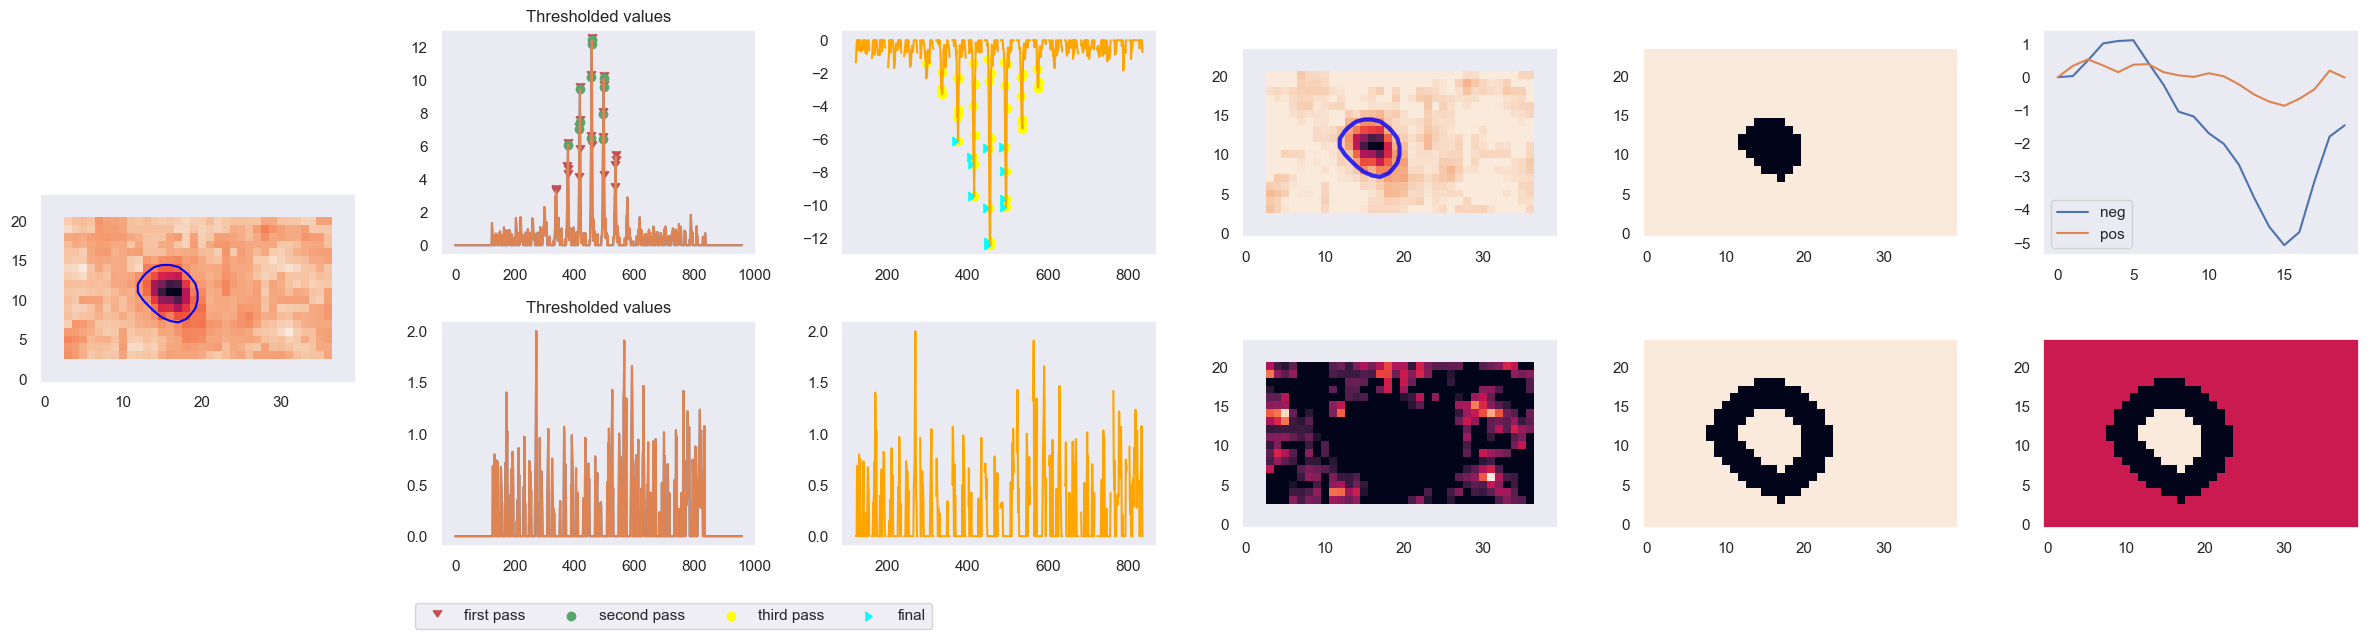

In [5]:
sns.set_theme(style="dark")
list_of_objs[0].demo_contouring(12)

## Pickle and save them (if changes needed)

# Plotting

In [16]:
import pygor.strf.plot
import pygor.strf.analyse
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")


In [17]:
cs_df = pygor.strf.analyse.cs_df(exp)
cs_df["Areas"] = 2 * np.sqrt(cs_df["Areas"].to_numpy()/np.pi)
cs_df

,Areas,C/S,Colour,pol,Amplitude,ROI,Filename
0,22.891863,Centre,R,-1,-7.185487,0,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...
1,0.000000,Surround,R,-1,1.081363,0,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...
2,16.141897,Centre,R,-1,-4.101274,1,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...
3,0.000000,Surround,R,-1,-0.809979,1,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...
4,0.000000,Centre,R,0,0.000000,2,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...
...,...,...,...,...,...,...,...
3211,0.000000,Surround,UV,0,0.000000,97,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...
3212,0.000000,Centre,UV,0,0.000000,98,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...
3213,0.000000,Surround,UV,0,0.000000,98,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...
3214,0.000000,Centre,UV,0,0.000000,99,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...


In [219]:
np.unique(cs_df["pol"])

array([-1,  0,  1,  2])

In [220]:
cs_df.query("`C/S` == 'Surround' & pol == [-1, 1] & `Areas` < 1")

,Areas,C/S,Colour,pol,Amplitude,ROI,Filename
1,0.0,Surround,R,-1,1.081363,0,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...
3,0.0,Surround,R,-1,0.582782,1,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...
9,0.0,Surround,R,-1,0.809498,4,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...
17,0.0,Surround,R,-1,1.177727,8,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...
19,0.0,Surround,R,-1,0.247375,9,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...
...,...,...,...,...,...,...,...
3833,0.0,Surround,UV,1,-0.615799,76,C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...
3835,0.0,Surround,UV,1,-0.778353,77,C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...
3837,0.0,Surround,UV,1,-1.095703,78,C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...
3843,0.0,Surround,UV,-1,0.423304,81,C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...


In [221]:
cs_df.query("Amplitude < 0")

,Areas,C/S,Colour,pol,Amplitude,ROI,Filename
0,22.891863,Centre,R,-1,-7.185487,0,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...
2,16.141897,Centre,R,-1,-4.101274,1,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...
8,13.504629,Centre,R,-1,-3.947351,4,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...
16,15.883154,Centre,R,-1,-5.220082,8,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...
18,13.022835,Centre,R,-1,-4.887479,9,C:\Users\SimenLab\OneDrive\h5s\2023-11-14_0_0_...
...,...,...,...,...,...,...,...
3833,0.000000,Surround,UV,1,-0.615799,76,C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...
3835,0.000000,Surround,UV,1,-0.778353,77,C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...
3837,0.000000,Surround,UV,1,-1.095703,78,C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...
3842,14.793391,Centre,UV,-1,-5.051107,81,C:\Users\SimenLab\OneDrive\h5s\2023-8-2_'0_1_C...


In [230]:
abs_cs_df = cs_df
abs_cs_df["Amplitude"] = np.abs(cs_df["Amplitude"])

In [222]:
for i in cs_df.keys():
    print(i, len(cs_df[i]))

Areas 3880
C/S 3880
Colour 3880
pol 3880
Amplitude 3880
ROI 3880
Filename 3880


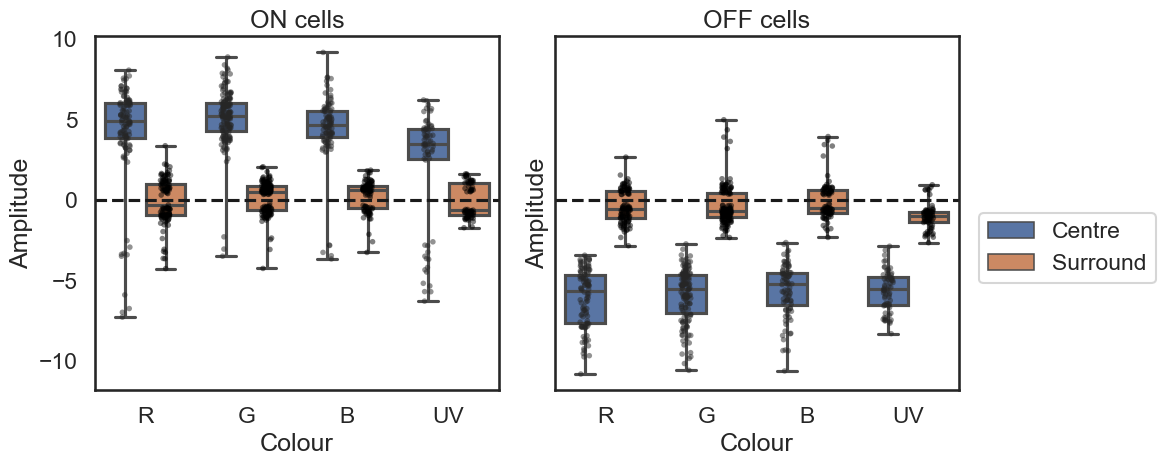

In [359]:
fig, ax = plt.subplots(1,2, figsize = (12, 5), sharey=True)
# SNS
sns.boxplot(cs_df.query("Amplitude != 0 and pol == 1"), x = "Colour", y = "Amplitude",  whis=10, hue = "C/S", ax = ax[0])
sns.boxplot(cs_df.query("Amplitude != 0 and pol == -1"), x = "Colour", y = "Amplitude", whis=10, hue = "C/S", ax = ax[1])
sns.stripplot(cs_df.query("Amplitude != 0 and pol == 1"), x = "Colour", y = "Amplitude", hue = "C/S", dodge = True, ax = ax[0], palette="dark:black", size = 4,alpha = .5)
sns.stripplot(cs_df.query("Amplitude != 0 and pol == -1"), x = "Colour", y = "Amplitude", hue = "C/S", dodge = True, ax = ax[1],palette="dark:black", size = 4,alpha = .5)
# Customise
ax.flat[0].get_legend().remove()
handles, labels = ax.flat[1].get_legend_handles_labels()
ax.flat[1].legend(handles = handles[:2], labels = labels[:2], bbox_to_anchor=(1.05, 0.5), loc=2, borderaxespad=0.)
ax.flat[0].axhline(0, ls = "--", c = "k")
ax.flat[1].axhline(0, ls = "--", c = "k")
plt.tight_layout()
ax[0].set_title("ON cells")
ax[1].set_title("OFF cells")
# plt.suptitle("Relative C/S contribution, Amplitude > 0 (split by polarity)", y = 1.05)
# plt.legend(title = "C/S")
plt.tight_layout()

In [801]:
import pygor.strf.clustering.run_clustering

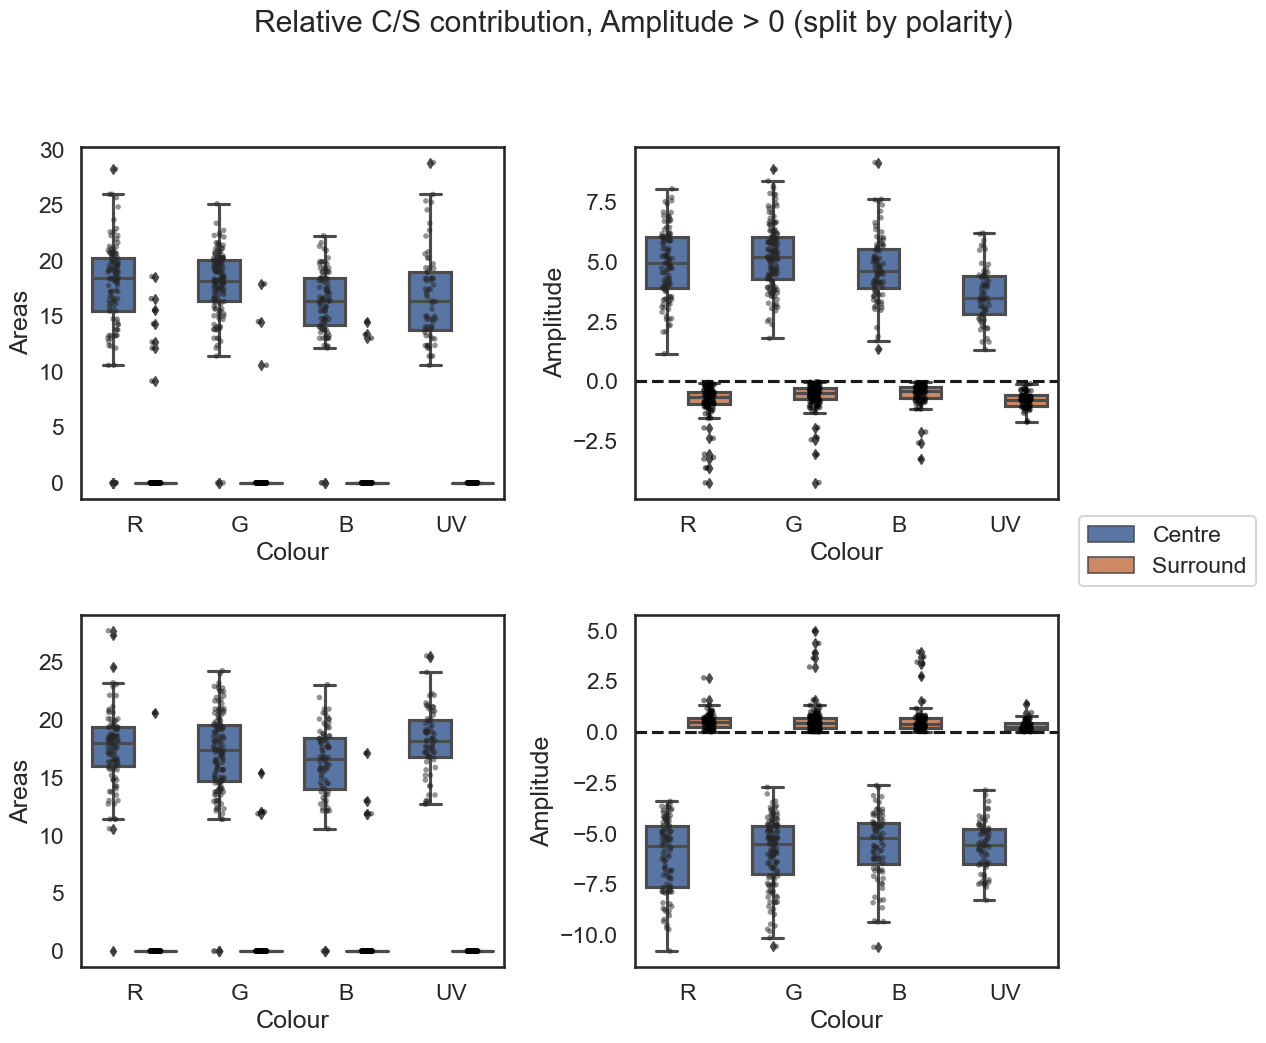

In [224]:
fig, ax = plt.subplots(2, 2, figsize = (13, 10))
# SNS
sns.boxplot(cs_df.query("Amplitude != 0 and pol == 1"), x = "Colour", y = "Areas", hue = "C/S", ax = ax.flat[0])
sns.boxplot(cs_df.query("Amplitude != 0 and pol == 1"), x = "Colour", y = "Amplitude", hue = "C/S", ax = ax.flat[1])
sns.boxplot(cs_df.query("Amplitude != 0 and pol == -1"), x = "Colour", y = "Areas", hue = "C/S", ax = ax.flat[2])
sns.boxplot(cs_df.query("Amplitude != 0 and pol == -1"), x = "Colour", y = "Amplitude", hue = "C/S", ax = ax.flat[3])
sns.stripplot(cs_df.query("Amplitude != 0 and pol == 1"), x = "Colour", y = "Areas", hue = "C/S", dodge = True, ax = ax.flat[0],     palette="dark:black", size = 4,alpha = .5)
sns.stripplot(cs_df.query("Amplitude != 0 and pol == 1"), x = "Colour", y = "Amplitude", hue = "C/S", dodge = True, ax = ax.flat[1], palette="dark:black", size = 4,alpha = .5)
sns.stripplot(cs_df.query("Amplitude != 0 and pol == -1"), x = "Colour", y = "Areas", hue = "C/S", dodge = True, ax = ax.flat[2],    palette="dark:black", size = 4,alpha = .5)
sns.stripplot(cs_df.query("Amplitude != 0 and pol == -1"), x = "Colour", y = "Amplitude", hue = "C/S", dodge = True, ax = ax.flat[3],palette="dark:black", size = 4,alpha = .5)
# Customise
ax.flat[0].get_legend().remove()
handles, labels = ax.flat[1].get_legend_handles_labels()
ax.flat[1].legend(handles = handles[:2], labels = labels[:2], bbox_to_anchor=(1.05, -.05), loc=2, borderaxespad=0.)
ax.flat[2].get_legend().remove()
ax.flat[3].get_legend().remove()
ax.flat[1].axhline(0, ls = "--", c = "k")
ax.flat[3].axhline(0, ls = "--", c = "k")
plt.tight_layout()
plt.suptitle("Relative C/S contribution, Amplitude > 0 (split by polarity)", y = 1.05)
# plt.legend(title = "C/S")
plt.tight_layout()

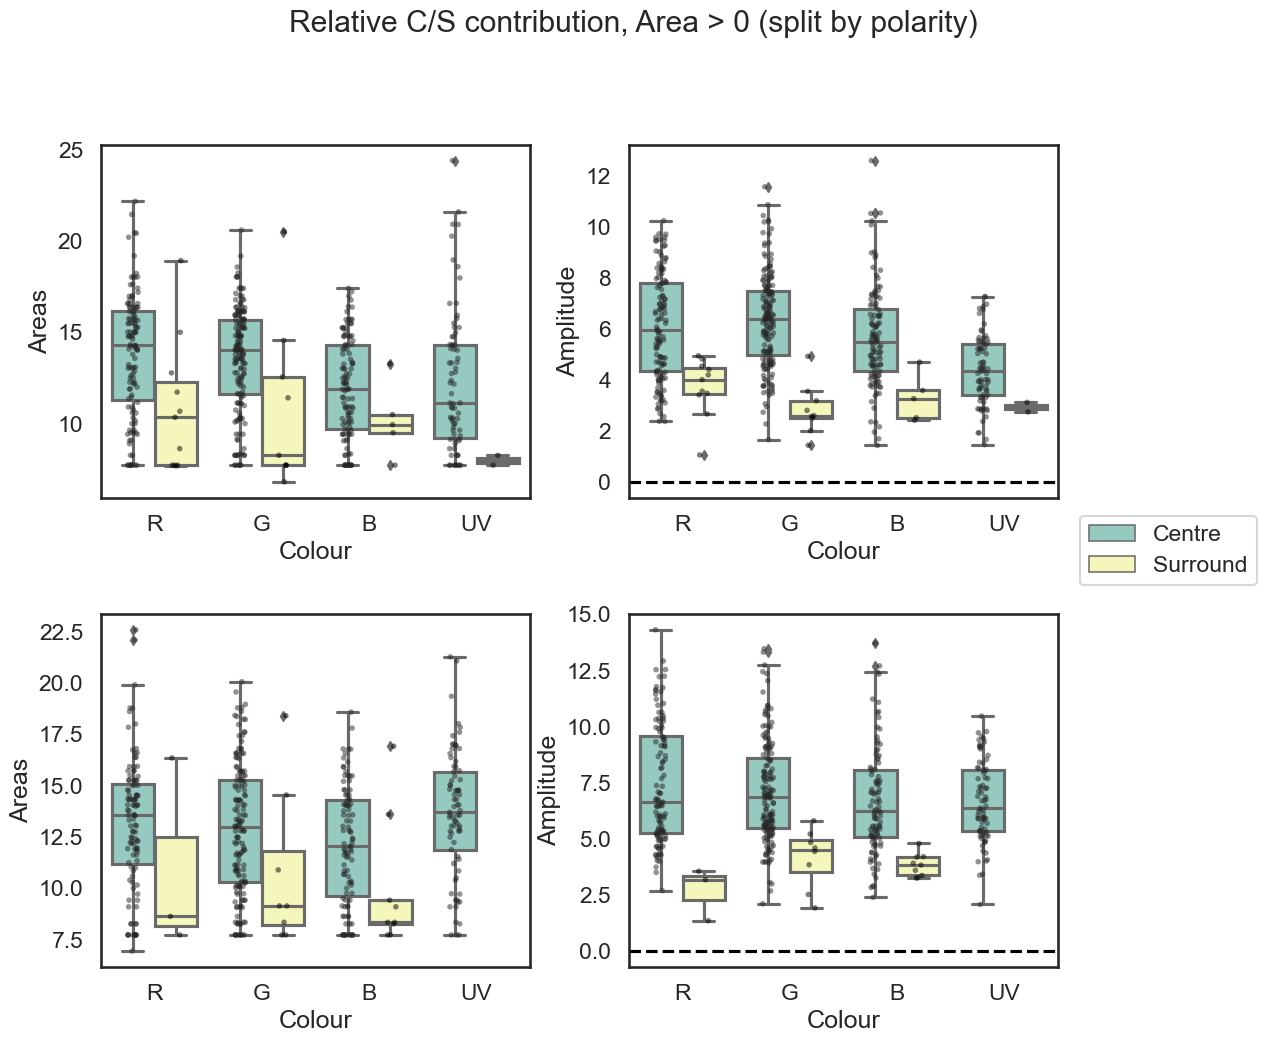

In [755]:
fig, ax = plt.subplots(2, 2, figsize = (13, 10))
# SNS
sns.boxplot(cs_df.query("Areas > 0 and pol == 1"), x = "Colour", y = "Areas", hue = "C/S", ax = ax.flat[0])
sns.boxplot(cs_df.query("Areas > 0 and pol == 1"), x = "Colour", y = "Amplitude", hue = "C/S", ax = ax.flat[1])
sns.boxplot(cs_df.query("Areas > 0 and pol == -1"), x = "Colour", y = "Areas", hue = "C/S", ax = ax.flat[2])
sns.boxplot(cs_df.query("Areas > 0 and pol == -1"), x = "Colour", y = "Amplitude", hue = "C/S", ax = ax.flat[3])
sns.stripplot(cs_df.query("Areas > 0 and pol == 1"), x = "Colour", y = "Areas", hue = "C/S", dodge = True, ax = ax.flat[0],     palette="dark:black", size = 4,alpha = .5)
sns.stripplot(cs_df.query("Areas > 0 and pol == 1"), x = "Colour", y = "Amplitude", hue = "C/S", dodge = True, ax = ax.flat[1], palette="dark:black", size = 4,alpha = .5)
sns.stripplot(cs_df.query("Areas > 0 and pol == -1"), x = "Colour", y = "Areas", hue = "C/S", dodge = True, ax = ax.flat[2],    palette="dark:black", size = 4,alpha = .5)
sns.stripplot(cs_df.query("Areas > 0 and pol == -1"), x = "Colour", y = "Amplitude", hue = "C/S", dodge = True, ax = ax.flat[3],palette="dark:black", size = 4,alpha = .5)
# Customise
ax.flat[0].get_legend().remove()
handles, labels = ax.flat[1].get_legend_handles_labels()
ax.flat[1].legend(handles = handles[:2], labels = labels[:2], bbox_to_anchor=(1.05, -.05), loc=2, borderaxespad=0.)
ax.flat[2].get_legend().remove()
ax.flat[3].get_legend().remove()
ax.flat[1].axhline(0, ls = "--", c = "k")
ax.flat[3].axhline(0, ls = "--", c = "k")
plt.tight_layout()
plt.suptitle("Relative C/S contribution, Area > 0 (split by polarity)", y = 1.05)
# plt.legend(title = "C/S")
plt.tight_layout()

<AxesSubplot: xlabel='C/S', ylabel='Amplitude'>

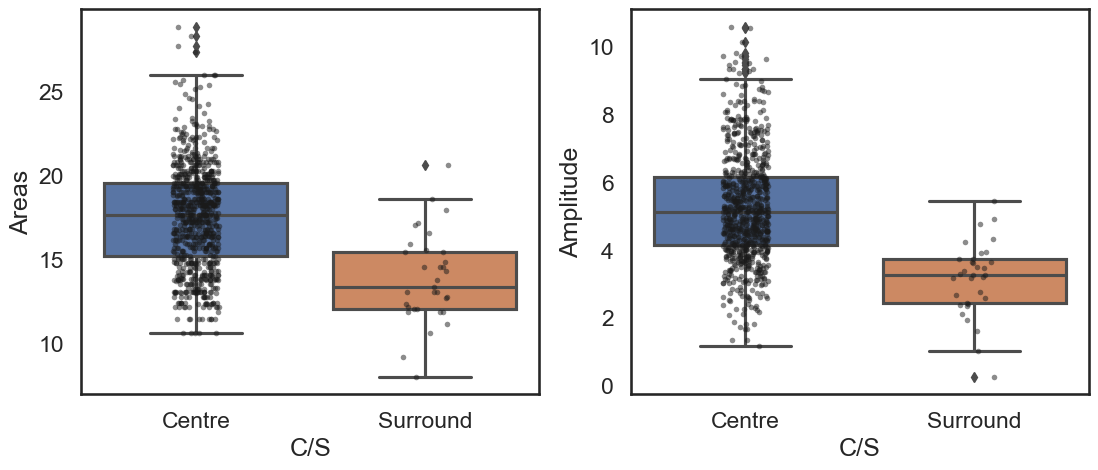

In [231]:
fig, ax = plt.subplots(1, 2, figsize = (13, 5))
sns.boxplot(abs_cs_df.query(  "Areas > 0"), y = "Areas", x = "C/S", ax=ax[0])
sns.boxplot(abs_cs_df.query(  "Areas > 0"), y = "Amplitude", x = "C/S", ax=ax[1])
sns.stripplot(abs_cs_df.query("Areas > 0"),  y = "Areas", x = "C/S", color = "k", size = 4,alpha = .5, ax=ax[0])
sns.stripplot(abs_cs_df.query("Areas > 0"),  y = "Amplitude", x = "C/S", color = "k", size = 4,alpha = .5, ax=ax[1])

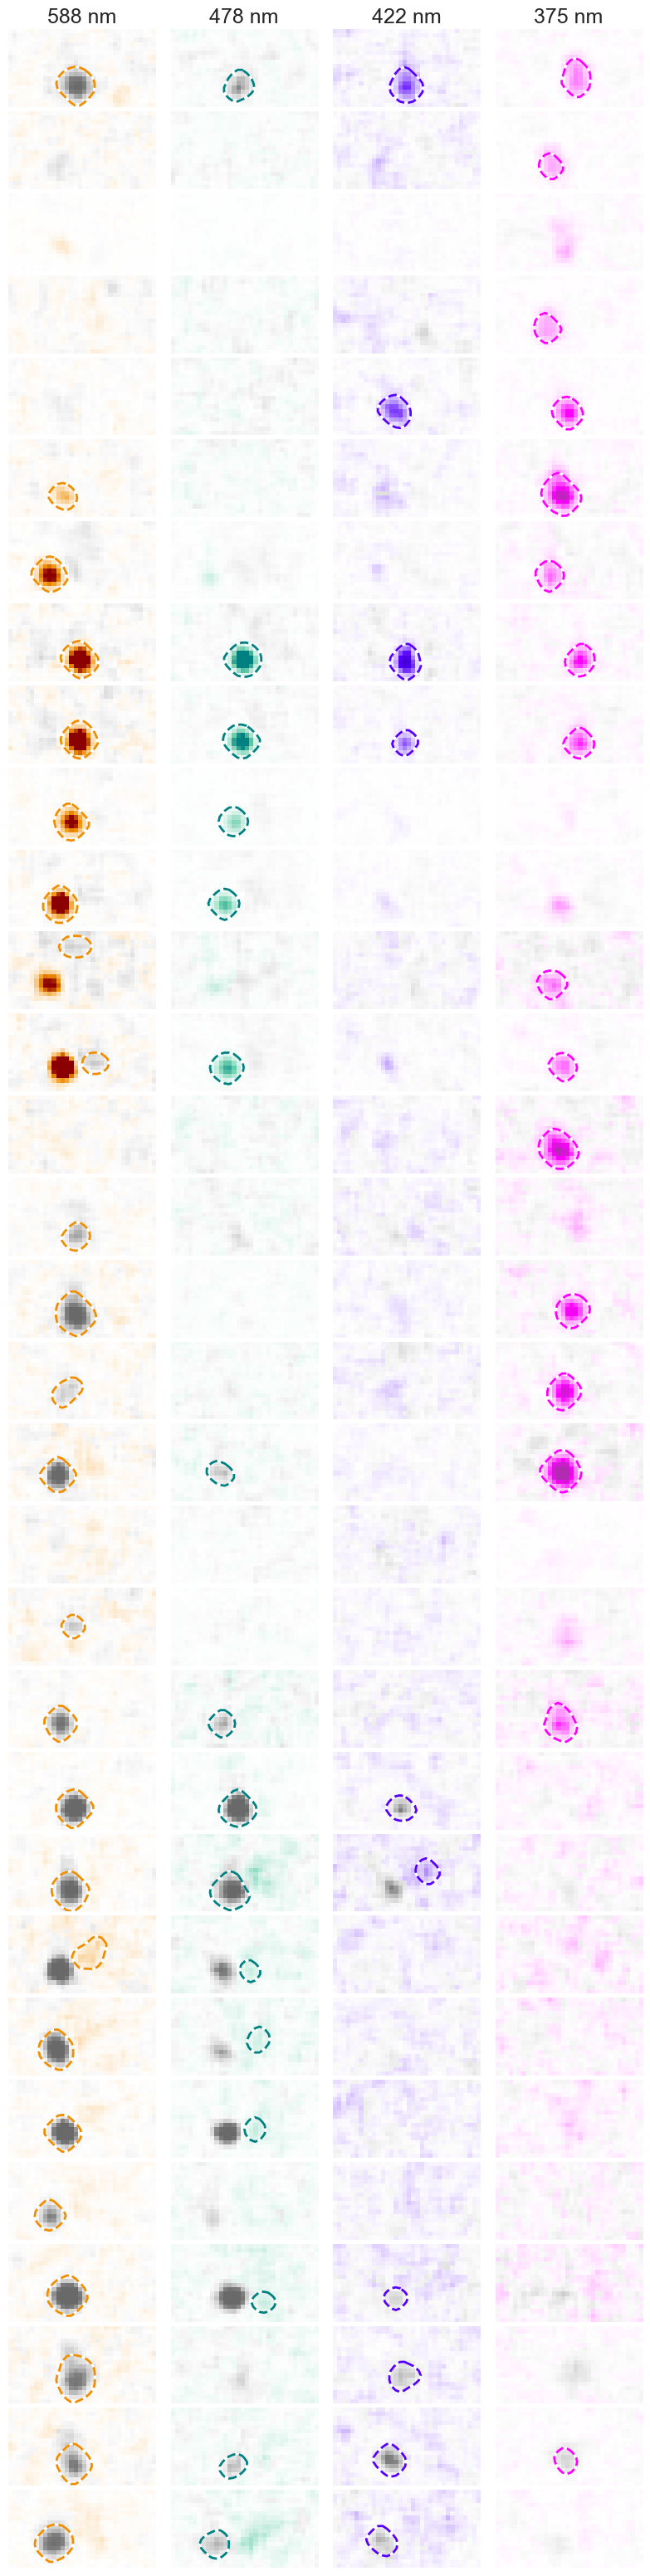

In [232]:
list_of_objs[6].plot_chromatic_overview()

Text(0.5, 1.05, 'Relative C/S contribution in dual-polarity cells')

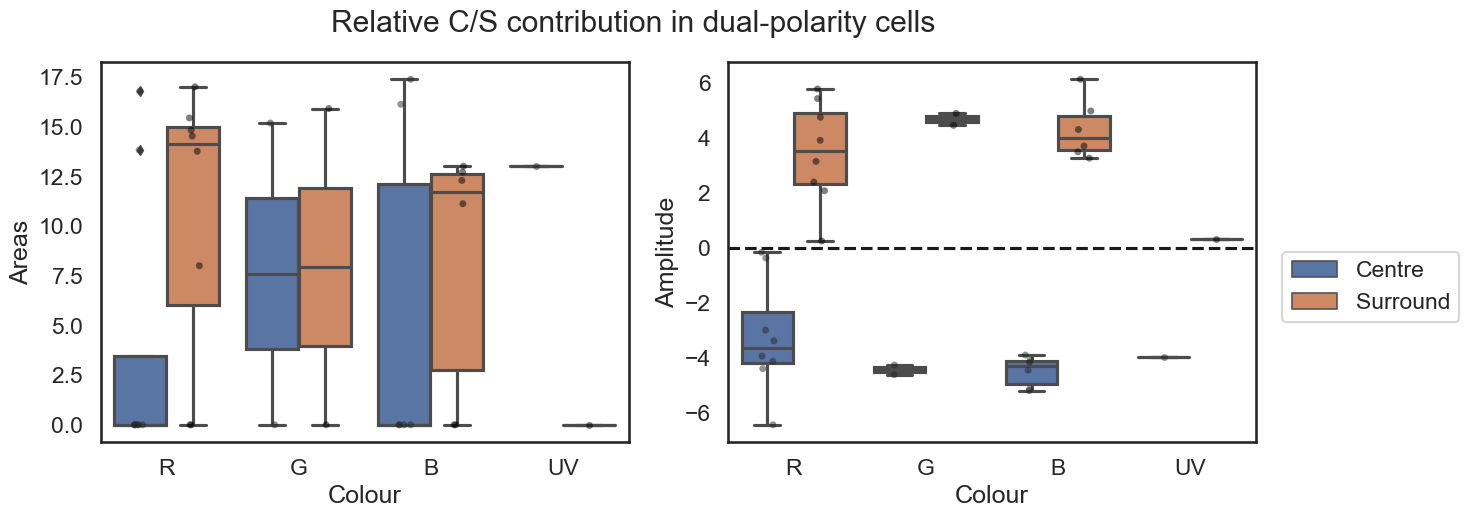

In [226]:
fig, ax = plt.subplots(1, 2, figsize = (13, 5))
sns.boxplot(cs_df.query(  "pol == 2"), x = "Colour", y = "Areas", hue = "C/S", whis = 2, ax = ax[0])
sns.boxplot(cs_df.query(  "pol == 2"), x = "Colour", y = "Amplitude", hue = "C/S", ax = ax[1])
sns.stripplot(cs_df.query("pol == 2"), x = "Colour", y = "Areas", hue = "C/S", dodge = True, ax = ax[0],     palette="dark:black", size = 5, alpha = .5)
sns.stripplot(cs_df.query("pol == 2"), x = "Colour", y = "Amplitude", hue = "C/S", dodge = True, ax = ax[1], palette="dark:black", size = 5, alpha = .5)
ax[0].get_legend().remove()
ax[1].axhline(0, ls = "--", c = "k")
plt.tight_layout()
handles, labels = ax.flat[1].get_legend_handles_labels()
ax.flat[1].legend(handles = handles[:2], labels = labels[:2],bbox_to_anchor=(1.05, .5), loc=2, borderaxespad=0.)
plt.suptitle("Relative C/S contribution in dual-polarity cells", y = 1.05)
# plt.legend(title = "C/S")

In [661]:
opsins = np.load(r"C:\Users\Simen\Downloads\AllOpsins.npy")

C:\Users\Simen\AppData\Local\Temp\ipykernel_17032\1199715339.py:9: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  ysmoothed = scipy.ndimage.filters.gaussian_filter1d(line, sigma=2)
C:\Users\Simen\AppData\Local\Temp\ipykernel_17032\1199715339.py:9: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  ysmoothed = scipy.ndimage.filters.gaussian_filter1d(line, sigma=2)
C:\Users\Simen\AppData\Local\Temp\ipykernel_17032\1199715339.py:9: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  ysmoothed = scipy.ndimage.filters.gaussian_filter1d(line, sigma=2)
C:\Users\Simen\AppData\Local\Temp\ipykernel_17032\1199715339.py:9: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage

Text(0, 0.5, 'Rel. absorbance')

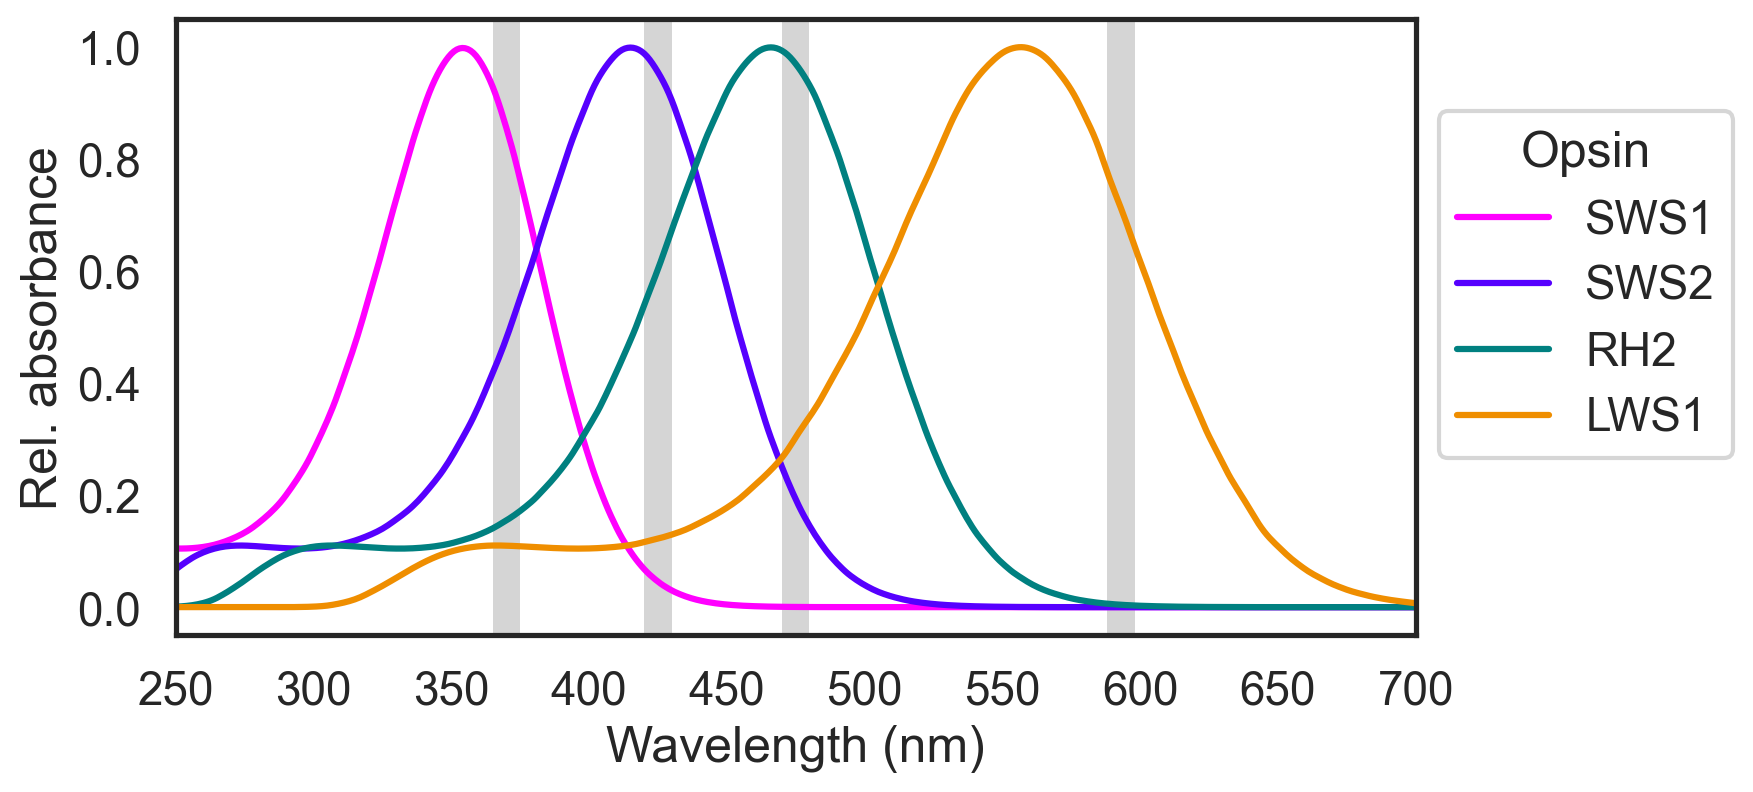

In [707]:
zeb_ops = [355, 416, 467, 558]
led_wvs = [365, 420, 470, 588]
ops_nam = ["SWS1", "SWS2", "RH2", "LWS1"]
colours = pygor.plotting.fish_palette
reversed(colours)
fig, ax = plt.subplots(1, 1, figsize = (8, 4), dpi = 200)
for n, i in enumerate(zeb_ops):
    line = opsins[i]
    ysmoothed = scipy.ndimage.filters.gaussian_filter1d(line, sigma=2)   
    plt.plot(ysmoothed, c =colours[n], label = f"{ops_nam[n]}")
    plt.axvspan(led_wvs[n], led_wvs[n]+10, color = "grey", alpha = .33, lw = 0)
plt.xlim(250, 700)
plt.legend(title = "Opsin", bbox_to_anchor=(1, .25), loc=0)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Rel. absorbance")

In [536]:
# centre_amps = cs_df.query("`C/S` == 'Centre'")["Amplitude"].to_numpy()
# surround_amps = cs_df.query("`C/S` == 'Surround'")["Amplitude"].to_numpy()
# amps = np.stack([centre_amps, surround_amps])
# plt.plot(amps, c = "k", alpha = 0.1)
# sns.lineplot(cs_df, x = "C/S", y = "Areas")

In [483]:
cs_df.query("pol == 2")

,Areas,C/S,Colour,pol,Amplitude,ROI,Filename
146,46.895,Centre,R,2,3.411975,29,C:\Users\Simen\OneDrive\h5s\2023-11-7_0_0_Colo...
147,154.847,Surround,R,2,2.968026,29,C:\Users\Simen\OneDrive\h5s\2023-11-7_0_0_Colo...
432,127.288,Centre,R,2,5.812566,172,C:\Users\Simen\OneDrive\h5s\2023-11-7_0_0_Colo...
433,46.895,Surround,R,2,4.762595,172,C:\Users\Simen\OneDrive\h5s\2023-11-7_0_0_Colo...
440,37.878,Centre,R,2,6.193679,176,C:\Users\Simen\OneDrive\h5s\2023-11-7_0_0_Colo...
...,...,...,...,...,...,...,...
2849,210.684,Surround,B,2,8.974141,84,C:\Users\Simen\OneDrive\h5s\2023-6-14_SMP_0_2_...
2856,138.630,Centre,B,2,5.009117,88,C:\Users\Simen\OneDrive\h5s\2023-6-14_SMP_0_2_...
2857,154.536,Surround,B,2,6.092381,88,C:\Users\Simen\OneDrive\h5s\2023-6-14_SMP_0_2_...
3306,46.895,Centre,UV,2,4.277153,57,C:\Users\Simen\OneDrive\h5s\2023-7-31_'0_1_Col...


In [94]:
cent, surr = list_of_objs[obj].get_contours_area()[0]

In [95]:
cent, surr

(array([193.931]), array([0]))

In [93]:
pols

array([-1,  2, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,
       -1,  0,  0, -1, -1,  0,  0, -1,  2,  0,  0, -1,  2,  0,  0, -1,  2,
        2,  0, -1, -1, -1,  0, -1, -1,  0,  1, -1,  0,  0,  1,  0,  0,  0,
        0, -1, -1,  0,  1, -1,  0,  0,  1, -1,  0,  0,  1, -1,  0,  0,  1,
        0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  0,  1,  1,
        1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  0,
        1,  1,  0,  0,  1,  1,  0,  0, -1,  1,  0,  0,  0,  1,  0,  0,  0,
        1, -1, -1,  1,  1])

In [81]:
area_tots

array([[400.984,  53.689,  46.895,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,  46.895,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,  81.051,   0.   ,   0.   ,   0.   , 311.379, 100.947,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,  53.689,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   , 271.996,  94.914,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
      

In [82]:
list_of_objs[0]

array([[ 0.00000000e+00,  2.86784608e-01,  8.46452582e-01,
         1.44483687e+00,  1.07966351e+00,  9.88380040e-01,
         9.89814180e-01,  1.58019192e+00,  1.80402187e+00,
         1.67216613e+00,  1.60038553e+00,  1.48762984e+00,
         1.07273007e+00,  4.34871756e-01, -1.72575522e+00,
        -4.81031995e+00, -8.17340947e+00, -9.41979705e+00,
        -6.58229281e+00, -3.43138573e+00],
       [ 0.00000000e+00,  7.75564193e-02,  2.40625912e-01,
         4.88735961e-01,  2.72248357e-01,  2.04308378e-01,
        -2.44524209e-01,  3.12685119e-01,  4.94129941e-01,
         1.52013346e+00,  1.80754270e+00,  1.73403002e+00,
         1.52818036e+00,  1.26308299e-01, -1.23791601e+00,
        -3.61663636e+00, -5.00131649e+00, -4.97197480e+00,
        -3.67190437e+00, -1.78368353e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.0

## Plot population stats roy-by-roi

In [398]:
roi_df = pygor.strf.analyse.roi_stats(exp)

C:\Users\Simen\Git_repos\pygor\src\pygor\strf\analyse.py:129: RuntimeWarning: Mean of empty slice
  dict["contour_complexity"] = np.nanmean(data_strf_obj.calc_contours_complexities(), axis = 1)
c:\Users\Simen\miniconda3\envs\strfclone\lib\site-packages\scipy\stats\_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\Users\Simen\miniconda3\envs\strfclone\lib\site-packages\scipy\stats\_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\Users\Simen\miniconda3\envs\strfclone\lib\site-packages\scipy\stats\_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
c:\Users\Simen\miniconda3\envs\strfclone\lib\site-packages\scipy\stats\_stats_py.py:4881: Co

In [399]:
roi_df.query("contour_area_total > 0")

,date,path,filename,roi,ipl_depths,multicolour,colour,simultaneous,combo,size,...,dom_biphasic_index,pols_corr,neg_auc,pos_auc,neg_peaktime,pos_peaktime,dom_peaktime,neg_centroids,pos_centroids,dom_centroids
0,2023-11-14,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,0,NaN,True,R,n,NaN,200,...,-0.359201,-0.100752,-17.139338,6.086507,17,14,17,1.412217,1.053281,1.412217
1,2023-11-14,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,0,NaN,True,G,n,NaN,200,...,-0.380754,0.042105,-10.829629,3.090279,16,11,16,1.277630,1.910247,1.277630
4,2023-11-14,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,1,NaN,True,R,n,NaN,200,...,-0.928148,-0.436090,-33.162453,5.193668,16,12,16,0.879593,0.818308,0.879593
7,2023-11-14,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,1,NaN,True,UV,n,NaN,200,...,0.156635,0.526316,0.162812,4.053417,8,17,17,3.193250,2.091699,2.091699
8,2023-11-14,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,2,NaN,True,R,n,NaN,200,...,-0.905392,-0.500752,-37.177267,6.066096,15,8,15,0.891282,0.914600,0.891282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916,2023-08-02,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,19,76.0,True,R,n,NaN,200,...,0.416457,0.676692,-5.299362,11.015269,11,17,17,0.570698,1.712345,1.712345
1917,2023-08-02,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,19,30.0,True,G,n,NaN,200,...,0.022875,0.831579,-2.519778,0.657939,3,16,16,1.474329,1.938580,1.938580
1918,2023-08-02,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,19,33.0,True,B,n,NaN,200,...,0.407295,0.708271,-2.396810,10.912470,8,15,15,1.408428,1.875875,1.875875
1921,2023-08-02,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,20,93.0,True,G,n,NaN,200,...,-0.937195,0.909774,-33.841774,-2.768600,15,2,15,0.915597,1.236513,0.915597


In [10]:
roi_df.columns

Index(['date', 'path', 'filename', 'roi', 'ipl_depths', 'multicolour',
       'colour', 'simultaneous', 'combo', 'size', 'shapeZ', 'shapeY', 'shapeX',
       'XYratio', 'visang_size', 'frequency', 'noise', 'time_pval',
       'space_pval', 'neg_contour_bool', 'pos_contour_bool',
       'neg_contour_count', 'pos_contour_count', 'total_contour_count',
       'neg_contour_area_total', 'pos_contour_area_total',
       'contour_area_total', 'contour_complexity', 'neg_extrema',
       'pos_extrema', 'polarity', 'neg_biphasic_index', 'pos_biphasic_index',
       'dom_biphasic_index', 'pols_corr', 'neg_auc', 'pos_auc', 'neg_peaktime',
       'pos_peaktime', 'dom_peaktime', 'neg_centroids', 'pos_centroids',
       'dom_centroids'],
      dtype='object')

### Assess how well contouring has worked
If the majority have 0 or 1 contour, we are good to go

<AxesSubplot: xlabel='total_contour_count', ylabel='Count'>

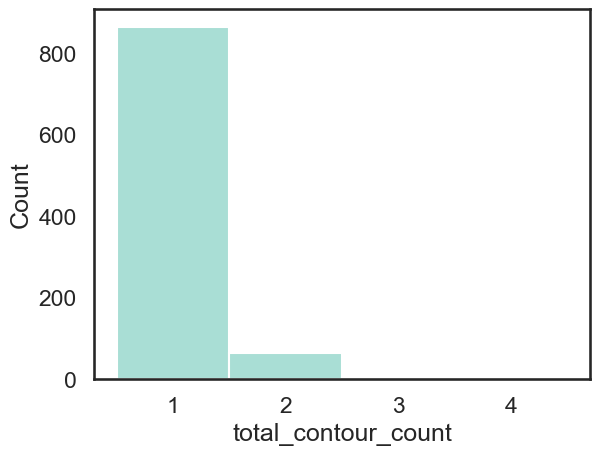

In [13]:
sns.histplot(roi_df.query("contour_area_total > 0"), x = "total_contour_count", discrete=True)

In [42]:
neg = roi_df["neg_contour_area_largest"].to_numpy()
pos = roi_df["pos_contour_area_largest"].to_numpy()

<AxesSubplot: xlabel='total_contour_area_largest', ylabel='dom_centroids'>

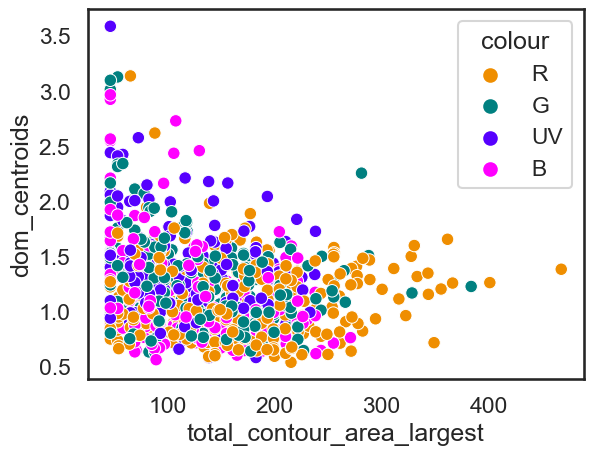

In [77]:
sns.scatterplot(data = roi_df.query("total_contour_area_largest > 0"), x = "total_contour_area_largest", y = "dom_centroids", hue = "colour", palette=pygor.plotting.custom.fish_palette)

In [26]:
roi_df.query("polarity == 1")

,date,path,filename,roi,ipl_depths,multicolour,colour,simultaneous,combo,size,...,dom_biphasic_index,pols_corr,neg_auc,pos_auc,neg_peaktime,pos_peaktime,dom_peaktime,neg_centroids,pos_centroids,dom_centroids


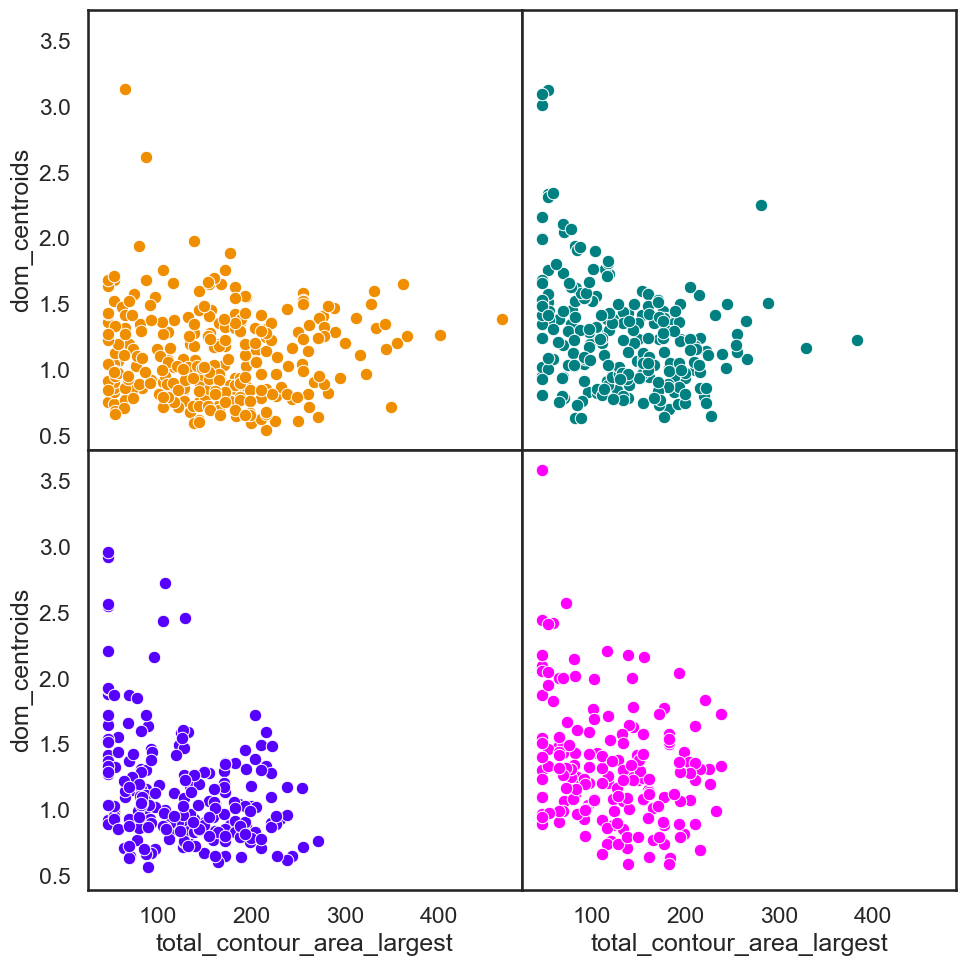

In [78]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
non_zeros = roi_df.query("contour_area_total > 0")
sns.scatterplot(data = non_zeros.query("colour == 'R'"), x = "total_contour_area_largest",  y = "dom_centroids", color=pygor.plotting.custom.fish_palette[0], ax = ax.flat[0])
sns.scatterplot(data = non_zeros.query("colour == 'G'"), x = "total_contour_area_largest",  y = "dom_centroids", color=pygor.plotting.custom.fish_palette[1], ax = ax.flat[1])
sns.scatterplot(data = non_zeros.query("colour == 'B'"), x = "total_contour_area_largest",  y = "dom_centroids", color=pygor.plotting.custom.fish_palette[2], ax = ax.flat[2])
sns.scatterplot(data = non_zeros.query("colour == 'UV'"), x = "total_contour_area_largest", y = "dom_centroids", color=pygor.plotting.custom.fish_palette[3], ax = ax.flat[3])
plt.tight_layout()


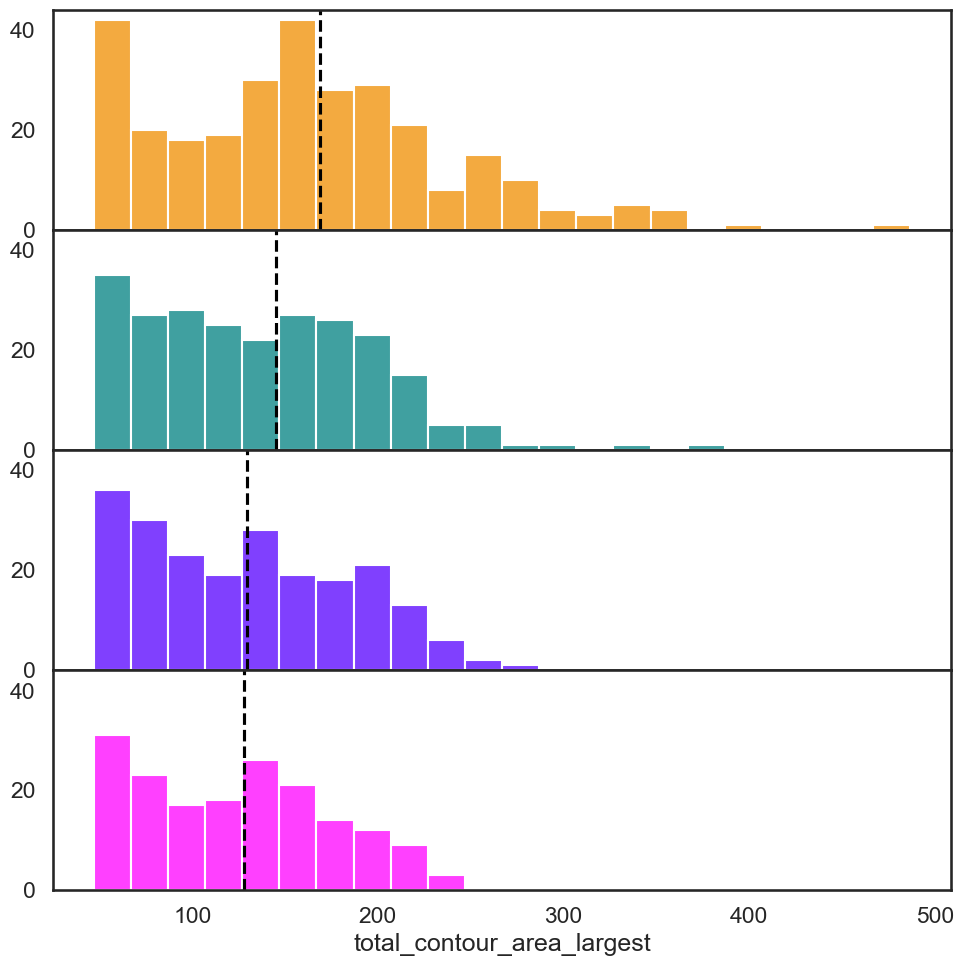

In [16]:
fig, ax = plt.subplots(4,1, figsize = (10, 10), sharex=True, sharey=True, gridspec_kw={'hspace': 0})
non_zeros = roi_df.query("contour_area_total > 0")
sns.histplot(data = non_zeros.query("colour == 'R'"), x = "total_contour_area_largest", color=pygor.plotting.custom.fish_palette[0], ax = ax.flat[0], element="bars", binwidth=20)
sns.histplot(data = non_zeros.query("colour == 'G'"), x = "total_contour_area_largest", color=pygor.plotting.custom.fish_palette[1], ax = ax.flat[1], element="bars", binwidth=20)
sns.histplot(data = non_zeros.query("colour == 'B'"), x = "total_contour_area_largest", color=pygor.plotting.custom.fish_palette[2], ax = ax.flat[2], element="bars", binwidth=20)
sns.histplot(data = non_zeros.query("colour == 'UV'"),x = "total_contour_area_largest", color=pygor.plotting.custom.fish_palette[3], ax = ax.flat[3], element="bars", binwidth=20)
colours = ["R", "G", "B", "UV"]
for a, c in zip(ax.flat, colours):
    a.set_ylabel("")
    a.axvline(np.average(non_zeros.query(f"colour == '{c}'")["contour_area_total"]), c = "k", ls = "--")
plt.tight_layout()


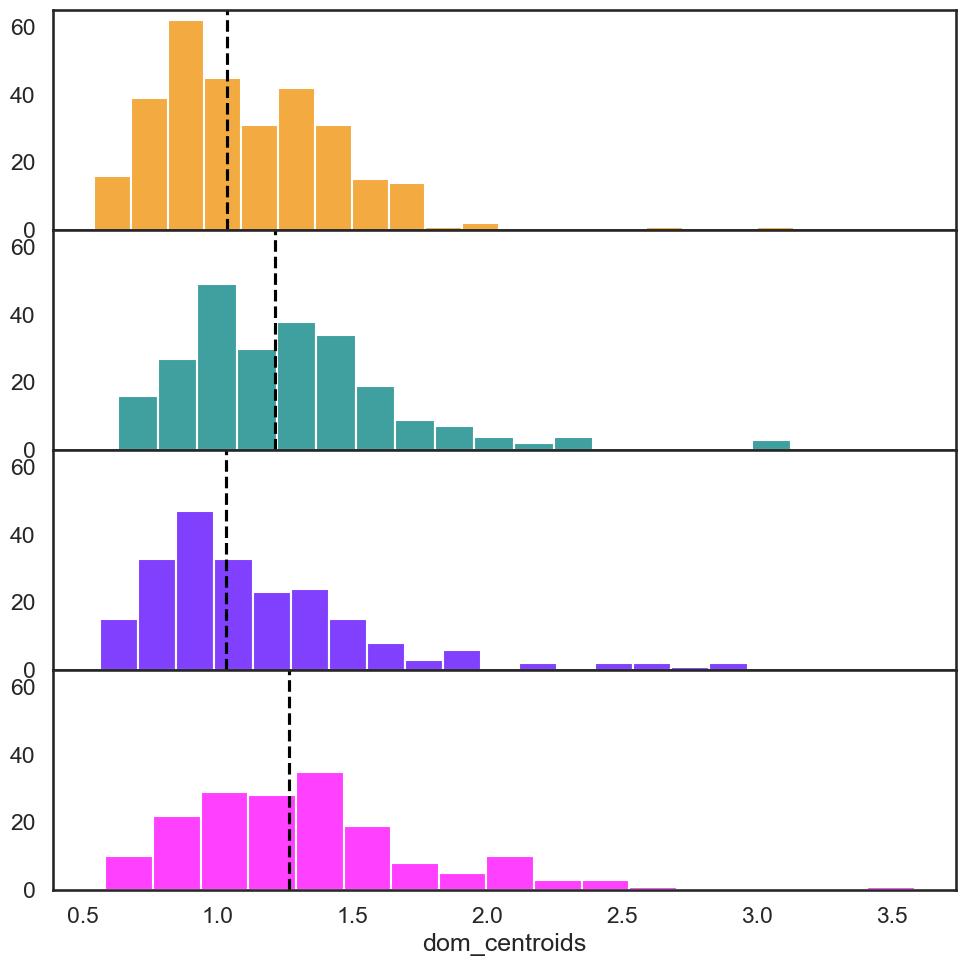

In [401]:
fig, ax = plt.subplots(4,1, figsize = (10, 10), sharex=True, sharey=True, gridspec_kw={'hspace': 0})
stat = "dom_centroids"
non_zeros = roi_df.query(f"{stat} > 0")
sns.histplot(data = non_zeros.query("colour == 'R'"), x = f"{stat}", color=pygor.plotting.custom.fish_palette[0], ax = ax.flat[0], element="bars")
sns.histplot(data = non_zeros.query("colour == 'G'"), x = f"{stat}", color=pygor.plotting.custom.fish_palette[1], ax = ax.flat[1], element="bars")
sns.histplot(data = non_zeros.query("colour == 'B'"), x = f"{stat}", color=pygor.plotting.custom.fish_palette[2], ax = ax.flat[2], element="bars")
sns.histplot(data = non_zeros.query("colour == 'UV'"),x = f"{stat}", color=pygor.plotting.custom.fish_palette[3], ax = ax.flat[3], element="bars")
colours = ["R", "G", "B", "UV"]
for a, c in zip(ax.flat, colours):
    a.set_ylabel("")
    a.axvline(np.median(non_zeros.query(f"colour == '{c}'")[f"{stat}"]), c = "k", ls = "--")
plt.tight_layout()


 Next thing to do is to plot centre-surround tunings, preferably from clusters
 1. Get clustering working 
 2. Get a CS param from each strf_obj
 3. Get a DF param accordingly, where hue = cs_bool/CS-loading 


In [74]:
list_of_objs[0].get_contours_area()

[(array([276.692]), array([0])),
 (array([111.449]), array([0])),
 (array([0]), array([0])),
 (array([0]), array([0])),
 (array([74.17]), array([0])),
 (array([0]), array([0])),
 (array([0]), array([0])),
 (array([0]), array([46.895])),
 (array([110.945]), array([0])),
 (array([69.707]), array([0])),
 (array([46.895]), array([0])),
 (array([0]), array([0])),
 (array([127.614]), array([0])),
 (array([0]), array([0])),
 (array([0]), array([0])),
 (array([0]), array([0])),
 (array([0]), array([183.272])),
 (array([0]), array([176.605])),
 (array([0]), array([125.02])),
 (array([0]), array([198.906])),
 (array([0]), array([255.492])),
 (array([0]), array([78.581])),
 (array([0]), array([64.57])),
 (array([0]), array([73.042])),
 (array([0]), array([46.895])),
 (array([0]), array([0])),
 (array([0]), array([78.581])),
 (array([0]), array([117.546])),
 (array([0]), array([0])),
 (array([0]), array([0])),
 (array([0]), array([159.439])),
 (array([0]), array([149.458])),
 (array([65.023]), arr

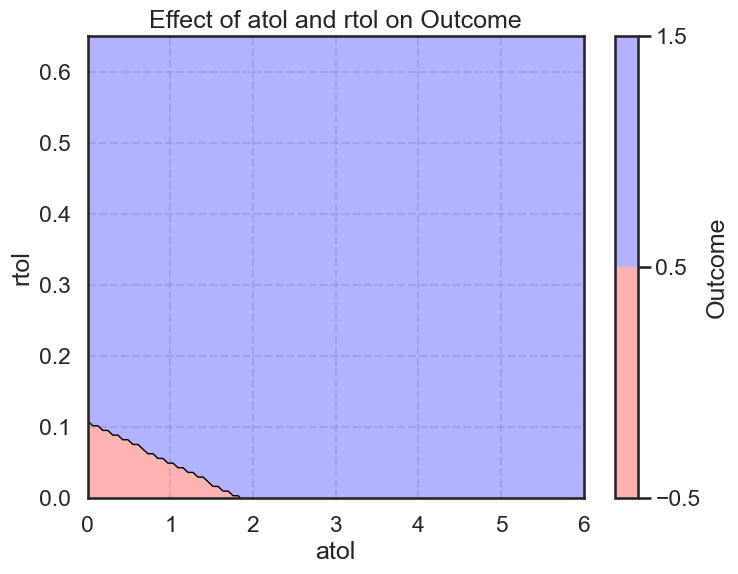

In [241]:
import numpy as np
import matplotlib.pyplot as plt

# Define arrays to compare
a = np.array([4])
b = np.array([5])

# Define a range of atol and rtol values to test
atol_values = np.linspace(0, 6, 100)  # Varying from 0 to 1 linearly
rtol_values = np.linspace(0, .65, 100)  # Varying from 0 to 1 linearly

# Create a meshgrid of atol and rtol values
atol_mesh, rtol_mesh = np.meshgrid(atol_values, rtol_values)

# Initialize an array to store the results
results = np.zeros_like(atol_mesh)

# Iterate through each combination of atol and rtol
for i in range(len(atol_values)):
    for j in range(len(rtol_values)):
        # Compute the result using np.isclose with current atol and rtol
        results[i, j] = np.isclose(a, b, atol=atol_values[i], rtol=rtol_values[j]).all()

# Plot the results
plt.figure(figsize=(8, 6))
plt.contourf(atol_mesh, rtol_mesh, results, levels=[-0.5, 0.5, 1.5], colors=['red', 'blue'], alpha=0.3)
plt.colorbar(label='Outcome')
plt.contour(atol_mesh, rtol_mesh, results, levels=[-0.5, 0.5], colors='k', linestyles='-', linewidths=1)
plt.xlabel('atol')
plt.ylabel('rtol')
plt.title('Effect of atol and rtol on Outcome')
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()


In [42]:
list_of_objs[0].get_polarities()

array([2., 2., 0., 0., 2., 0., 0., 2., 2., 2., 2., 0., 2., 0., 0., 0., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 0., 0., 2., 2., 2., 0.,
       0., 2., 0., 0., 2., 2., 2., 2., 2., 2.])

In [82]:
roi_df.filter(items = ["contour_area_total", "colour"]).groupby("colour").describe().reindex(['R', 'G', 'B', 'UV'])

contour_area_total                                                      \
                    count        mean         std  min  25%      50%      75%   
colour                                                                          
R                   485.0  159.752089  166.527485  0.0  0.0  143.676  250.096   
G                   485.0  115.184019  148.808341  0.0  0.0    0.000  198.908   
B                   485.0   92.912903  124.020294  0.0  0.0    0.000  172.890   
UV                  485.0   69.439860  112.254040  0.0  0.0    0.000  133.464   

                 
            max  
colour           
R       969.876  
G       819.898  
B       633.930  
UV      643.612

In [46]:
stat = "dom_centroids"
Rs = roi_df.filter(items = [f"{stat}", "contour_area_total" , "colour"]).query("colour == 'R' & contour_area_total > 0")
Gs = roi_df.filter(items = [f"{stat}", "contour_area_total" , "colour"]).query("colour == 'G' & contour_area_total > 0")
Bs = roi_df.filter(items = [f"{stat}", "contour_area_total" , "colour"]).query("colour == 'B' & contour_area_total > 0")
Uvs = roi_df.filter(items =[f"{stat}", "contour_area_total", "colour"]).query("colour == 'UV' & contour_area_total > 0")
F, p = scipy.stats.f_oneway(Rs[f"{stat}"], Gs[f"{stat}"], Bs[f"{stat}"], Uvs[f"{stat}"])
print('%.08f' % p)

0.00000000


## Plot population stats by chromaticity

In [18]:
chroma_df = pygor.strf.analyse.chromatic_stats(exp)
chroma_df

C:\Users\Simen\Git_repos\pygor\src\pygor\strf\analyse.py:280: RuntimeWarning: Mean of empty slice
  complexities = pygor.utilities.multicolour_reshape(np.nanmean(pygor.strf.contouring.complexity_weighted(data_strf_obj.fit_contours(), data_strf_obj.get_contours_area()), axis = 1), num_wavelengths)
C:\Users\Simen\Git_repos\pygor\src\pygor\strf\analyse.py:280: RuntimeWarning: Mean of empty slice
  complexities = pygor.utilities.multicolour_reshape(np.nanmean(pygor.strf.contouring.complexity_weighted(data_strf_obj.fit_contours(), data_strf_obj.get_contours_area()), axis = 1), num_wavelengths)
C:\Users\Simen\Git_repos\pygor\src\pygor\strf\analyse.py:280: RuntimeWarning: Mean of empty slice
  complexities = pygor.utilities.multicolour_reshape(np.nanmean(pygor.strf.contouring.complexity_weighted(data_strf_obj.fit_contours(), data_strf_obj.get_contours_area()), axis = 1), num_wavelengths)
C:\Users\Simen\Git_repos\pygor\src\pygor\strf\analyse.py:280: RuntimeWarning: Mean of empty slice
  comple

,date,path,filename,curr_path,strf_keys,cell_id,size,ipl_depths,opp_bool,ampl_375,...,peakpos_478,peakpos_588,pol_375,pol_422,pol_478,pol_588,roi,spatial_X,spatial_Y,temporal_len
0,2023-11-14,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,STRF0_0,2023-11-14_0_0_SWN_200_Colours11-14-2023_STRF0_0,200,95.0,True,0.000000,...,0.715,0.650,0,0,-1,-1,0,24,40,4
1,2023-11-14,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,STRF0_1,2023-11-14_0_0_SWN_200_Colours11-14-2023_STRF0_1,200,81.0,True,0.000000,...,0.000,0.585,0,0,0,-1,1,24,40,4
2,2023-11-14,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,STRF0_2,2023-11-14_0_0_SWN_200_Colours11-14-2023_STRF0_2,200,81.0,True,0.000000,...,0.715,0.520,0,0,-1,-1,2,24,40,4
3,2023-11-14,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,STRF0_3,2023-11-14_0_0_SWN_200_Colours11-14-2023_STRF0_3,200,75.0,True,0.000000,...,0.000,0.130,0,0,0,-1,3,24,40,4
4,2023-11-14,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,2023-11-14_0_0_SWN_200_Colours.h5,C:\Users\Simen\OneDrive\h5s\2023-11-14_0_0_SWN...,STRF0_4,2023-11-14_0_0_SWN_200_Colours11-14-2023_STRF0_4,200,43.0,False,4.685262,...,1.040,1.040,1,1,1,1,4,24,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,2023-08-02,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,STRF0_20,2023-8-2_'0_1_ColourSWN_200_1H'08-02-2023_STRF...,200,83.0,True,0.000000,...,0.520,0.000,0,-1,-1,0,20,24,40,4
398,2023-08-02,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,STRF0_21,2023-8-2_'0_1_ColourSWN_200_1H'08-02-2023_STRF...,200,61.0,False,0.000000,...,0.000,0.000,0,0,0,0,21,24,40,4
399,2023-08-02,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,STRF0_22,2023-8-2_'0_1_ColourSWN_200_1H'08-02-2023_STRF...,200,84.0,False,0.000000,...,0.000,0.000,0,0,0,0,22,24,40,4
400,2023-08-02,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,2023-8-2_'0_1_ColourSWN_200_1H'.h5,C:\Users\Simen\OneDrive\h5s\2023-8-2_'0_1_Colo...,STRF0_23,2023-8-2_'0_1_ColourSWN_200_1H'08-02-2023_STRF...,200,34.0,False,0.000000,...,0.000,0.000,0,0,0,0,23,24,40,4


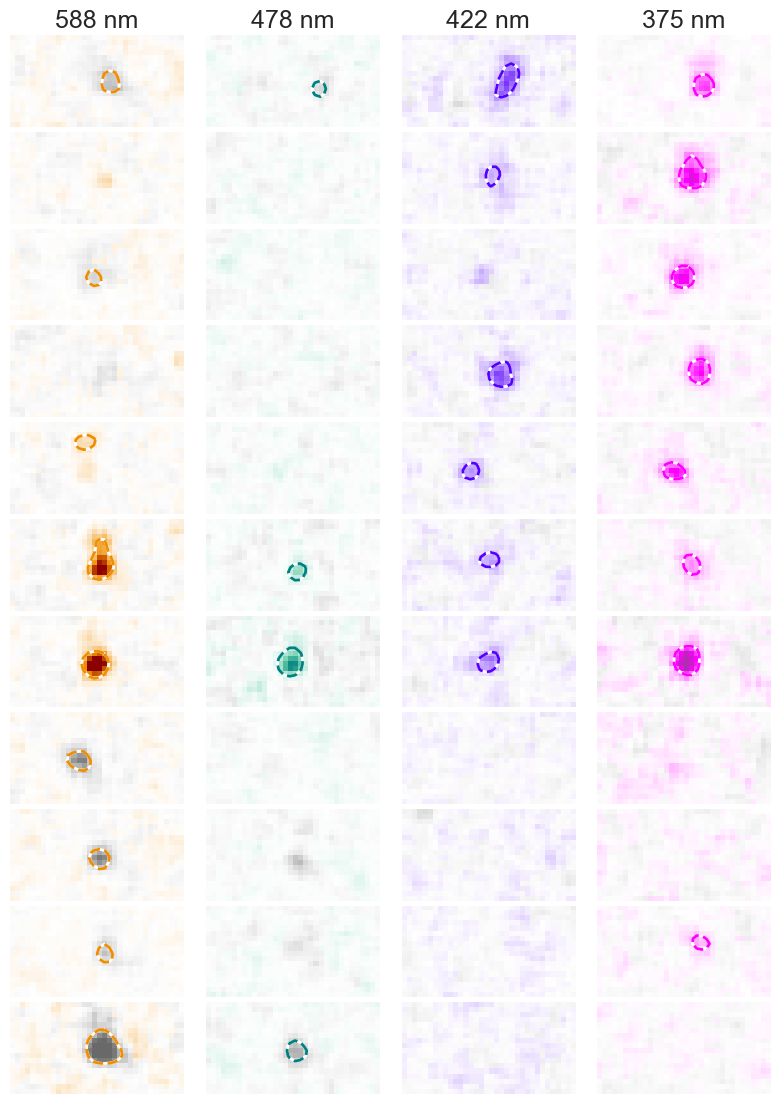

In [ ]:
list_of_objs[0].plot_chromatic_overview()

In [ ]:
list_of_objs[0].run_bootstrap('y')

Hang on, bootstrapping pygor.strf.temporal components 2500 times:   0%|          | 0/44 [00:00<?, ?it/s]

Hang on, bootstrapping spatial components 1000 times:   0%|          | 0/44 [00:00<?, ?it/s]

14-11-2023:STRF:2023-11-14_0_0_SWN_200_Colours

In [ ]:
RUV_cell = chroma_df.query("area_375 > 1 & area_588 > 1")
target = RUV_cell.filter(like = "area")[["area_375", "area_588"]]

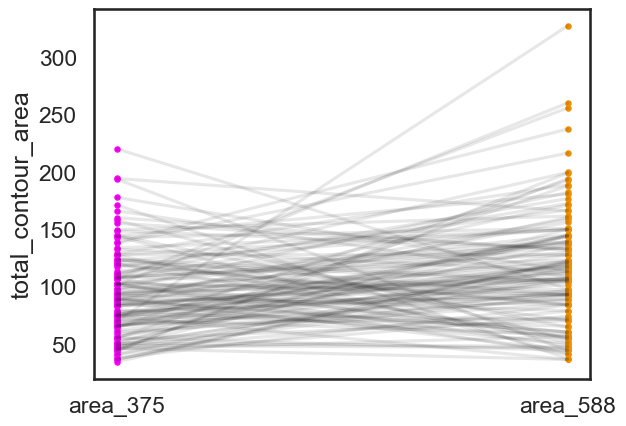

In [ ]:
plt.scatter(x = [np.repeat(0, len(target))], y = RUV_cell.filter(like = "area")[["area_375"]], color = pygor.plotting.custom.fish_palette[-1], s=10)
plt.scatter(x = [np.repeat(1, len(target))], y = RUV_cell.filter(like = "area")[["area_588"]], color = pygor.plotting.custom.fish_palette[0] , s=10)
plt.ylabel("total_contour_area")
plt.plot(target.T, color = "k", alpha = .1);

(0.0, 400.0)

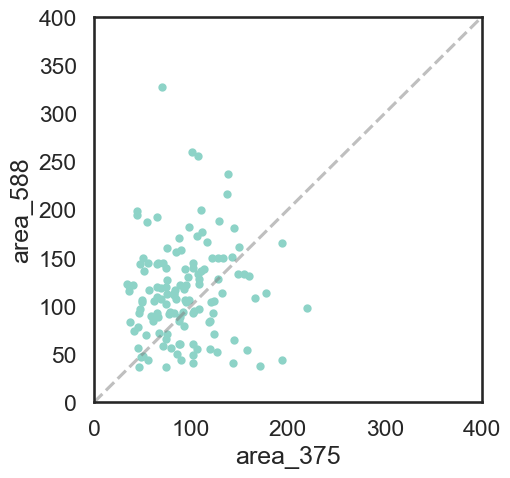

In [ ]:
plt.subplots(1, 1, figsize = (5, 5))
plt.plot([0, 800], [0, 800], color = "grey", ls = "--", alpha = .5)
plt.scatter(target["area_375"], target["area_588"], s = 20)
plt.xlabel("area_375")
plt.ylabel("area_588")
plt.xlim(0, 400)
plt.ylim(0, 400)


In [ ]:
RUV_cell = chroma_df.query("area_375 > 1 & area_588 > 1 & area_422 > 1 & area_478 > 1")
target = RUV_cell.filter(like = "area")[["area_375", "area_588"]]

(10.0, 210.0)

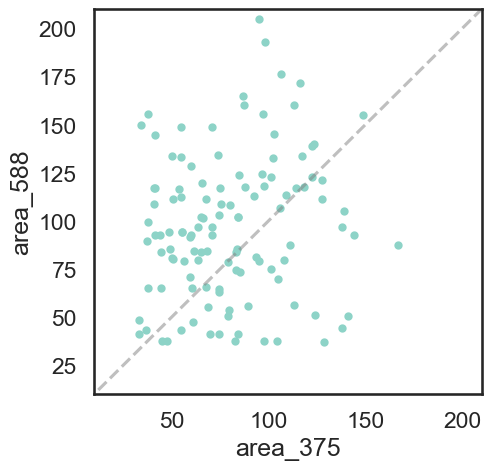

In [ ]:
plt.subplots(1, 1, figsize = (5, 5))
plt.plot([0, 800], [0, 800], color = "grey", ls = "--", alpha = .5)
plt.scatter(chroma_df["area_375"], chroma_df["area_588"], s = 20)
plt.xlabel("area_375")
plt.ylabel("area_588")
plt.xlim(10, 210)
plt.ylim(10, 210)


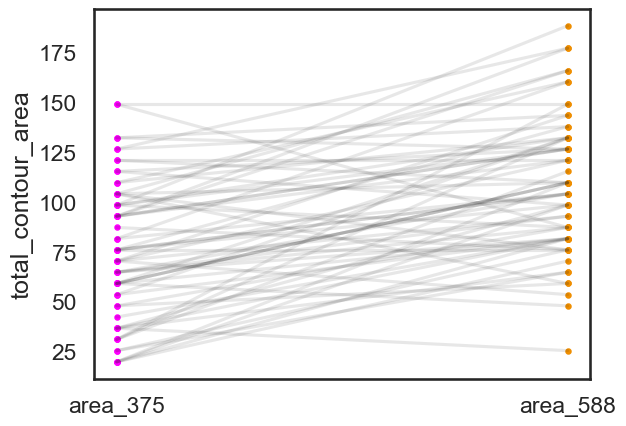

In [ ]:
plt.scatter(x = [np.repeat(0, len(target))], y = RUV_cell.filter(like = "area")[["area_375"]], color = pygor.plotting.custom.fish_palette[-1], s=10)
plt.scatter(x = [np.repeat(1, len(target))], y = RUV_cell.filter(like = "area")[["area_588"]], color = pygor.plotting.custom.fish_palette[0] , s=10)
plt.ylabel("total_contour_area")
plt.plot(target.T, color = "k", alpha = .1);

In [ ]:
RUV_cell = chroma_df.query("area_375 > 1 & area_588 > 1 & area_422 > 1 & area_478 > 1")
target = RUV_cell.filter(like = "area")[["area_375", "area_588"]]

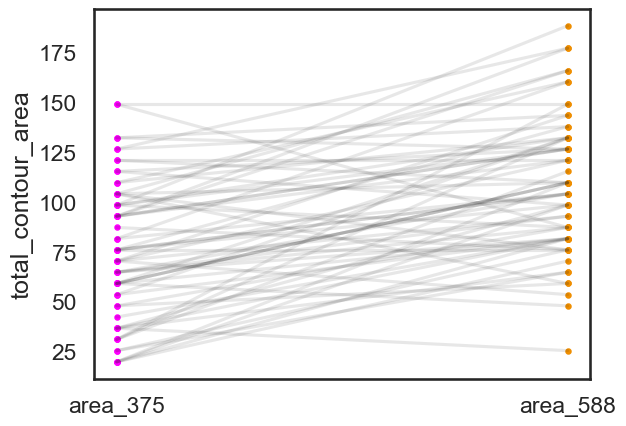

In [ ]:
plt.scatter(x = [np.repeat(0, len(target))], y = RUV_cell.filter(like = "area")[["area_375"]], color = pygor.plotting.custom.fish_palette[-1], s=10)
plt.scatter(x = [np.repeat(1, len(target))], y = RUV_cell.filter(like = "area")[["area_588"]], color = pygor.plotting.custom.fish_palette[0] , s=10)
plt.ylabel("total_contour_area")
plt.plot(target.T, color = "k", alpha = .1);

In [ ]:
ruv_colour = [pygor.plotting.custom.fish_palette[-1], pygor.plotting.custom.fish_palette[0]]

<AxesSubplot: >

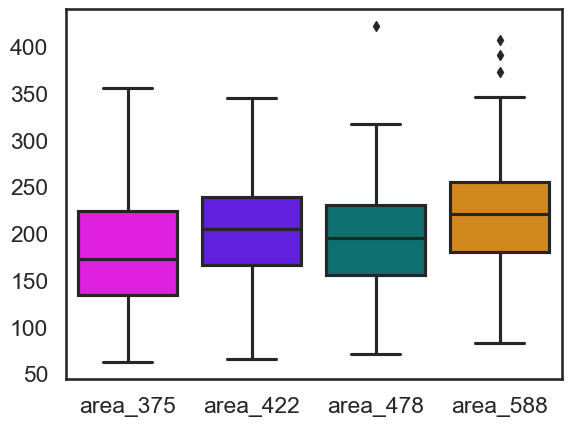

In [ ]:
sns.boxplot(data = chroma_df.filter(like = "area").query("area_375 > 1 & area_588 > 1 & area_422 > 1 & area_478 > 1"), palette = reversed(pygor.plotting.fish_palette))

(0.0, 700.0)

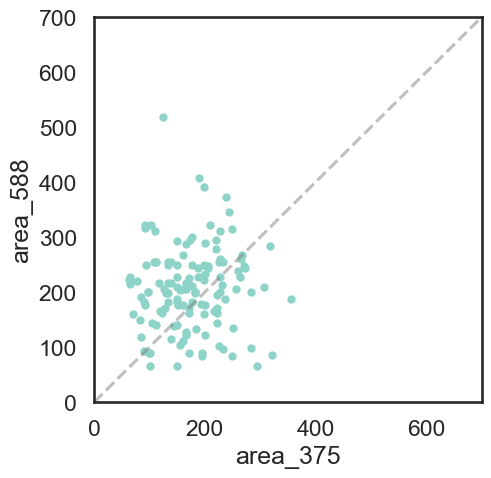

In [ ]:
plt.subplots(1, 1, figsize = (5, 5))
plt.plot([0, 800], [0, 800], color = "grey", ls = "--", alpha = .5)
plt.scatter(target["area_375"], target["area_588"], s = 20)
plt.xlabel("area_375")
plt.ylabel("area_588")
plt.xlim(0, 700)
plt.ylim(0, 700)


## Clustering on chromatic properties

In [97]:
import pygor.strf.clustering

Automatic number determined as AIC = -942.3288559942673 landing on covariance_type = spherical with  10 n_components
Automatic number determined as AIC = -21342.382811090232 landing on covariance_type = full with  6 n_components
Automatic number determined as AIC = -20780.622976803756 landing on covariance_type = full with  11 n_components
Automatic number determined as AIC = -2605.824612157604 landing on covariance_type = tied with  14 n_components


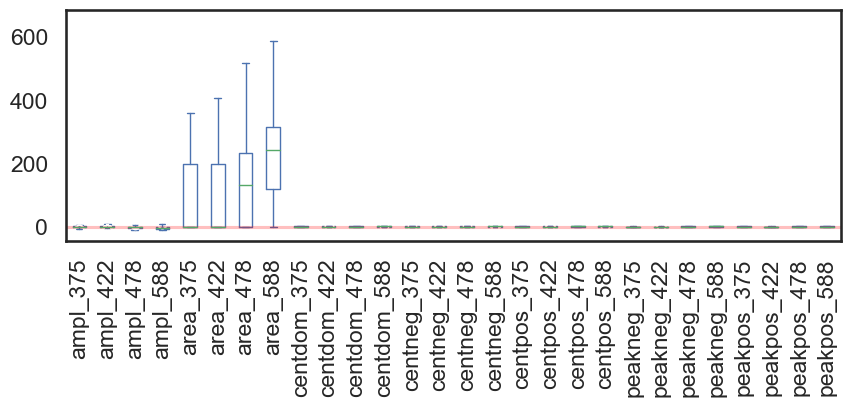

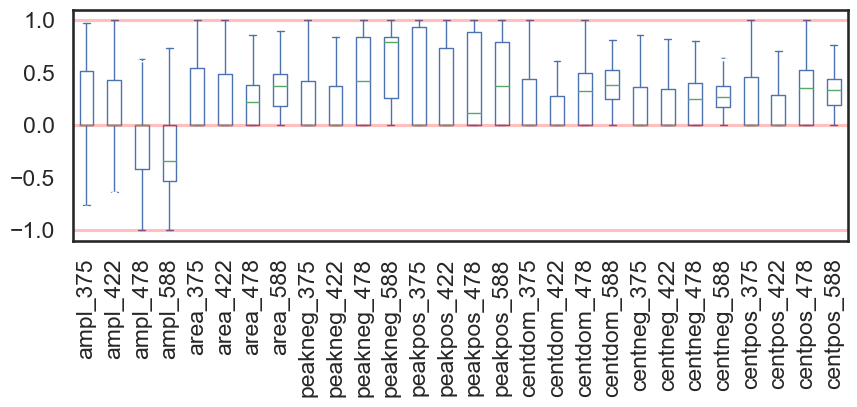

In [98]:
merged_pca_df, merged_stats_df, org_stats_df = pygor.strf.clustering.run_clustering(chroma_df)

In [100]:
merged_stats_df

,ampl_375,ampl_422,ampl_478,ampl_588,area_375,area_422,area_478,area_588,peakneg_375,peakneg_422,...,centpos_478,centpos_588,cat_pol,pol_375,pol_422,pol_478,pol_588,cluster_id,ipl_depths,cluster
36,0.000000,0.385652,0.000000,0.000000,0.000000,0.560776,0.000000,0.000000,0.000000,0.368421,...,0.000000,0.000000,mix,0,2,0,0,mix_4,99.0,4
37,0.000000,0.428641,0.237055,0.448188,0.000000,0.328156,0.286694,0.630433,0.000000,0.578947,...,0.464326,0.333654,mix,0,1,2,1,mix_2,41.0,2
40,0.000000,0.000000,-0.538257,0.449434,0.000000,0.000000,0.421105,0.254103,0.000000,0.000000,...,0.603082,0.259659,mix,0,0,-1,2,mix_6,79.0,6
121,0.000000,-0.334247,-0.455689,-0.685462,0.000000,0.475881,0.300740,0.476842,0.000000,0.736842,...,0.393213,0.710131,mix,0,-1,2,-1,mix_5,93.0,5
127,0.000000,0.000000,-0.439783,-0.816688,0.000000,0.000000,0.210988,0.467916,0.000000,0.000000,...,0.494050,0.568860,mix,0,0,2,-1,mix_9,77.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,-0.470774,0.000000,0.000000,-0.493974,0.566710,0.000000,0.000000,0.320689,0.473684,0.000000,...,0.000000,0.432860,opp,1,0,0,-1,opp_4,60.0,35
186,0.432121,0.000000,0.000000,-0.543682,0.596803,0.000000,0.000000,0.467226,0.421053,0.000000,...,0.000000,0.449404,opp,1,0,0,-1,opp_4,60.0,35
203,0.000000,0.000000,0.372829,-0.451590,0.000000,0.000000,0.644731,0.228085,0.000000,0.000000,...,0.381651,0.265714,opp,0,0,1,-1,opp_3,82.0,34
206,0.000000,0.000000,0.336222,-0.447287,0.000000,0.000000,0.349141,0.337812,0.000000,0.000000,...,0.487654,1.000000,opp,0,0,1,-1,opp_11,77.0,30
